# Branching ratios

A newly discovered particle was found to be able to decay in two different ways (two different decay channels): $\alpha$ and $\beta$. The probability $f_\alpha$ for decay $\alpha$ to happen is called its _branching ratio_.

## Tasks

Solve the tasks below.
For each task, give reasons for your solution by commenting in the notebook.
In conclusion, summarize your findings and contextualize them. What have you learned? Do the results make sense?

Your results will be examined for plagiarism. Please use your own plot styles, articulate your own thoughts, and present your own experimental approaches.

a) For a fixed number N of observed decays, explain why the number of decays to channel $\alpha$ should follow a binomial distribution.

b) Write down the conditional p.d.f. (aka posterior probability distribution) obtained via Bayes' theorem $P(f_\alpha|\vec{k})$ where $\vec{k}$ are your observations. Explain the parameters and the different terms. What do you want to describe with $P(f_\alpha|\vec{k})$?

c) Assuming a flat prior for the branching ratio $\pi(f_\alpha)=1 \forall f_\alpha\in[0,1]$ calculate and draw the posterior probability distribution for $f_\alpha$ after measuring a single decay, which went to $\alpha$.

d) Using the previous result as a prior, calculate and draw the new posterior after each of the observed additional decays "$\beta$", "$\alpha$", "$\alpha$", "$\beta$"

e) Calculate and draw the posterior after observing 100 decays, with 58 going to $\alpha$.


### Hints

1. It is recommended to not start coding right away.
1. Realize what **one experiment** means in this task and how you then construct your Likelihood.

You can solve this problem by explicitly going through the single steps of the calculations. When representing the distributions with numpy arrays, 'np.sum()' comes in handy in the calculation of the normalization. Alternatively, you can also use the beta pdf which was discussed in the lecture and which is accessible through the scipy.stats package 'from scipy.stats import beta‘.


a) This follows a binomial distribution, because we have a constant branching ratio and therefore seperate independant trials between decay $\alpha$ and $\beta$.

b) from the manual we get the Posterior as $P(\vec{\lambda} \mid x)=\frac{L(x \mid \vec{\lambda}) \pi(\vec{\lambda})}{\int L(x \mid \vec{\lambda}) \pi(\vec{\lambda}) d \vec{\lambda}}$

$\Rightarrow P\left(f_\alpha \mid \vec{k}\right)=\frac{L\left(\vec{k} \mid f_\alpha\right) \pi\left(f_\alpha\right)}{\int L\left(\vec{k} \mid f_\alpha\right) \pi\left(f_\alpha\right) d f_\alpha} $

Here, k is the data to be measured and f is the parameter to be estimated.
L is the likelyhood function. $\pi$ is the prior distribution. The posterior estimates the branching ratio after considering the Likelyhood and Prior functions.

c)

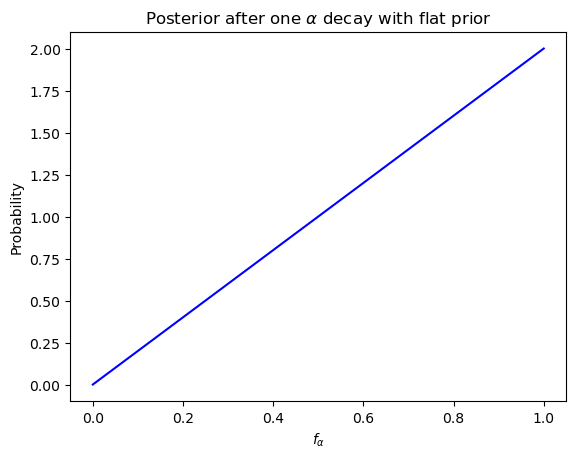

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# flat prior: a=1, b=1
# after one alpha: a=2, b=1
a, b = 2, 1
space = np.linspace(0, 1, 200)
pdf = beta.pdf(space, a, b)

plt.plot(space, pdf, color='blue')
plt.title(r"Posterior after one $\alpha$ decay with flat prior")
plt.xlabel(r"$f_\alpha$")
plt.ylabel("Probability")
plt.show()



d) we're calculating this 4 times, but use one plot to show all four posteriors.

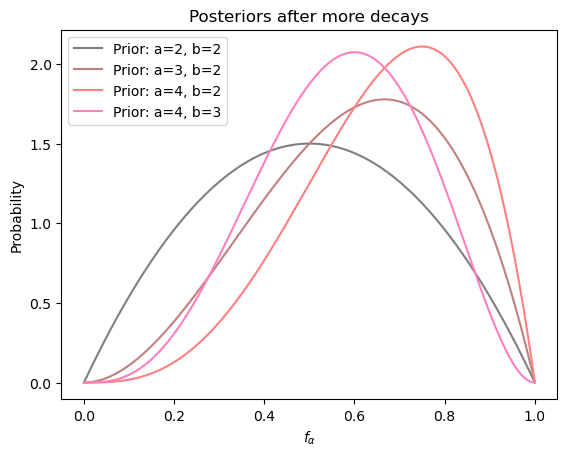

In [51]:
events = ["b", "a", "a", "b"]
#from c)
a, b = 2, 1
posteriors = [(a,b)]

space = np.linspace(0,1,200)

for event in events:
    if event == "a":
        a += 1
    elif event == "b":
        b += 1
    posteriors.append((a, b))
    pdf = beta.pdf(space, a, b)
    plt.plot(space, pdf, label=f"Prior: a={a}, b={b}", color=(a/4, 0.5, b/4))

plt.legend()
plt.xlabel(r"$f_\alpha$")
plt.ylabel("Probability")
plt.title("Posteriors after more decays")
plt.show()


e)

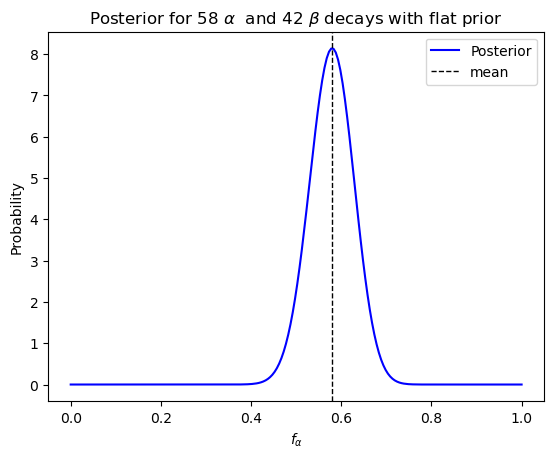

In [62]:
#again, because of the flat prior (1,1) we have 59, 43
a, b = 59, 43

mean = a / (a + b)

space = np.linspace(0,1,200)
plt.plot(space, beta.pdf(space, a, b), color='blue', label=r"Posterior")
plt.axvline(mean, color='black', ls='--', lw=1, label="mean")
plt.title(r"Posterior for 58 $\alpha$  and 42 $\beta$ decays with flat prior")
plt.xlabel(r"$f_\alpha$")
plt.ylabel("Probability")
plt.legend()
plt.show()
